<div class="alert alert-block alert-success">
    <h1 align="center">Scikit-Learn Tips</h1>
    <h3 align="center">Tip 14: Decision Tree Tips</h3>
    <h4 align="center"><a href="http://www.iran-machinelearning.ir">Soheil Tehranipour</a></h5>
</div>

### we will use plot_tree instead of Graphviz

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\soso\Desktop\Maktbakhoone\Scikit-Learn Tips\data.csv')
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [2]:
features = ['Pclass', 'Fare', 'Sex']
X = df[features]
y = df['Survived']

In [3]:
classes = ['Deceased', 'Survived']

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2, random_state=0)
dt.fit(X, y)

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text  # both are new in 0.21

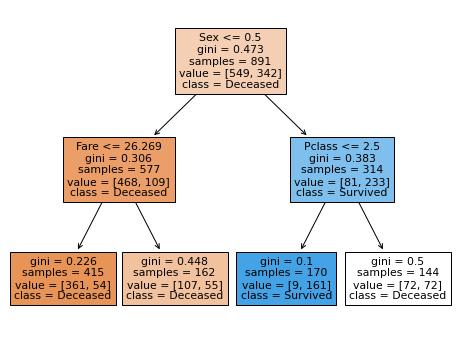

In [6]:
plt.figure(figsize=(8, 6))
plot_tree(dt, feature_names=features, class_names=classes, filled=True);

In [7]:
print(export_text(dt, feature_names=features, show_weights=True))

|--- Sex <= 0.50
|   |--- Fare <= 26.27
|   |   |--- weights: [361.00, 54.00] class: 0
|   |--- Fare >  26.27
|   |   |--- weights: [107.00, 55.00] class: 0
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- weights: [9.00, 161.00] class: 1
|   |--- Pclass >  2.50
|   |   |--- weights: [72.00, 72.00] class: 0



# Pruning

In [10]:
import pandas as pd
df = pd.read_csv(r'C:\Users\soso\Desktop\Maktbakhoone\Scikit-Learn Tips\data.csv')
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [11]:
features = ['Pclass', 'Fare', 'Sex', 'Parch']
X = df[features]
y = df['Survived']

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [13]:
# default tree has 331 nodes
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X, y).tree_.node_count

331

In [14]:
cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()

0.8036281463812692

In [15]:
# pruned tree has 121 nodes
dt = DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)
dt.fit(X, y).tree_.node_count

121

In [16]:
# pruning improved the cross-validated accuracy
cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()

0.8081162513338773

<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />